In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal
%matplotlib inline

In [15]:
N=10            # サンプルを取得する位置 x の個数
M=[0,1,3,9]     # 多項式の次数

In [16]:
# データセット {x_n,y_n} (n=1...N) を用意
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x,y], index=['x','y']),
                                 ignore_index=True)
    return dataset


In [17]:
# 平方根平均二乗誤差（Root mean square error）を計算
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

In [20]:
# 最小二乗法で解を求める
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi,p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    return (f, ws)

Table of the coefficients
        M=0       M=1        M=3             M=9
0 -0.139409  0.525398  -0.056195       -0.051497
1       NaN -1.329615   8.794789      289.889905
2       NaN       NaN -27.307440    -6295.320280
3       NaN       NaN  18.459230    54650.612934
4       NaN       NaN        NaN  -249885.694367
5       NaN       NaN        NaN   666867.677101
6       NaN       NaN        NaN -1074908.517889
7       NaN       NaN        NaN  1030116.121911
8       NaN       NaN        NaN  -539942.584324
9       NaN       NaN        NaN   119107.807392


/Users/arimuraterutoshi/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


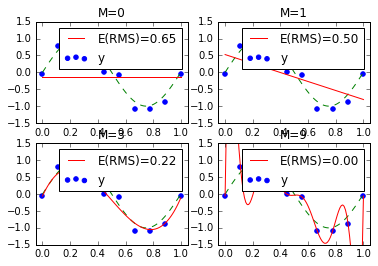

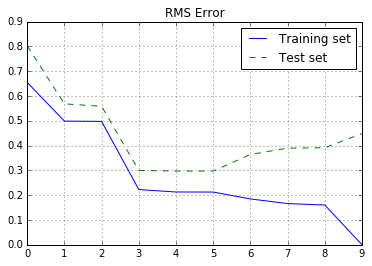

In [19]:
train_set = create_dataset(N)
test_set = create_dataset(N)
df_ws = DataFrame()
# 多項式近似の曲線を求めて表示
fig = plt.figure()
for c, m in enumerate(M):
    f, ws = resolve(train_set, m)
    df_ws = df_ws.append(Series(ws,name="M=%d" % m))
    subplot = fig.add_subplot(2,2,c+1)
    subplot.set_xlim(-0.05,1.05)
    subplot.set_ylim(-1.5,1.5)
    subplot.set_title("M=%d" % m)
    # トレーニングセットを表示
    subplot.scatter(train_set.x, train_set.y, marker='o', color='blue')
    # 真の曲線を表示
    linex = np.linspace(0,1,101)
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green', linestyle='--')
    # 多項式近似の曲線を表示
    linex = np.linspace(0,1,101)
    liney = f(linex)
    label = "E(RMS)=%.2f" % rms_error(train_set, f)
    subplot.plot(linex, liney, color='red', label=label)
    subplot.legend(loc=1)
# 係数の値を表示
print("Table of the coefficients")
print( df_ws.transpose())
fig.show()
# トレーニングセットとテストセットでの誤差の変化を表示
df = DataFrame(columns=['Training set','Test set'])
for m in range(0,10):   # 多項式の次数
    f, ws = resolve(train_set, m)
    train_error = rms_error(train_set, f)
    test_error = rms_error(test_set, f)
    df = df.append(
            Series([train_error, test_error],
                index=['Training set','Test set']),
            ignore_index=True)
df.plot(title='RMS Error', style=['-','--'], grid=True, ylim=(0,0.9))
plt.show()